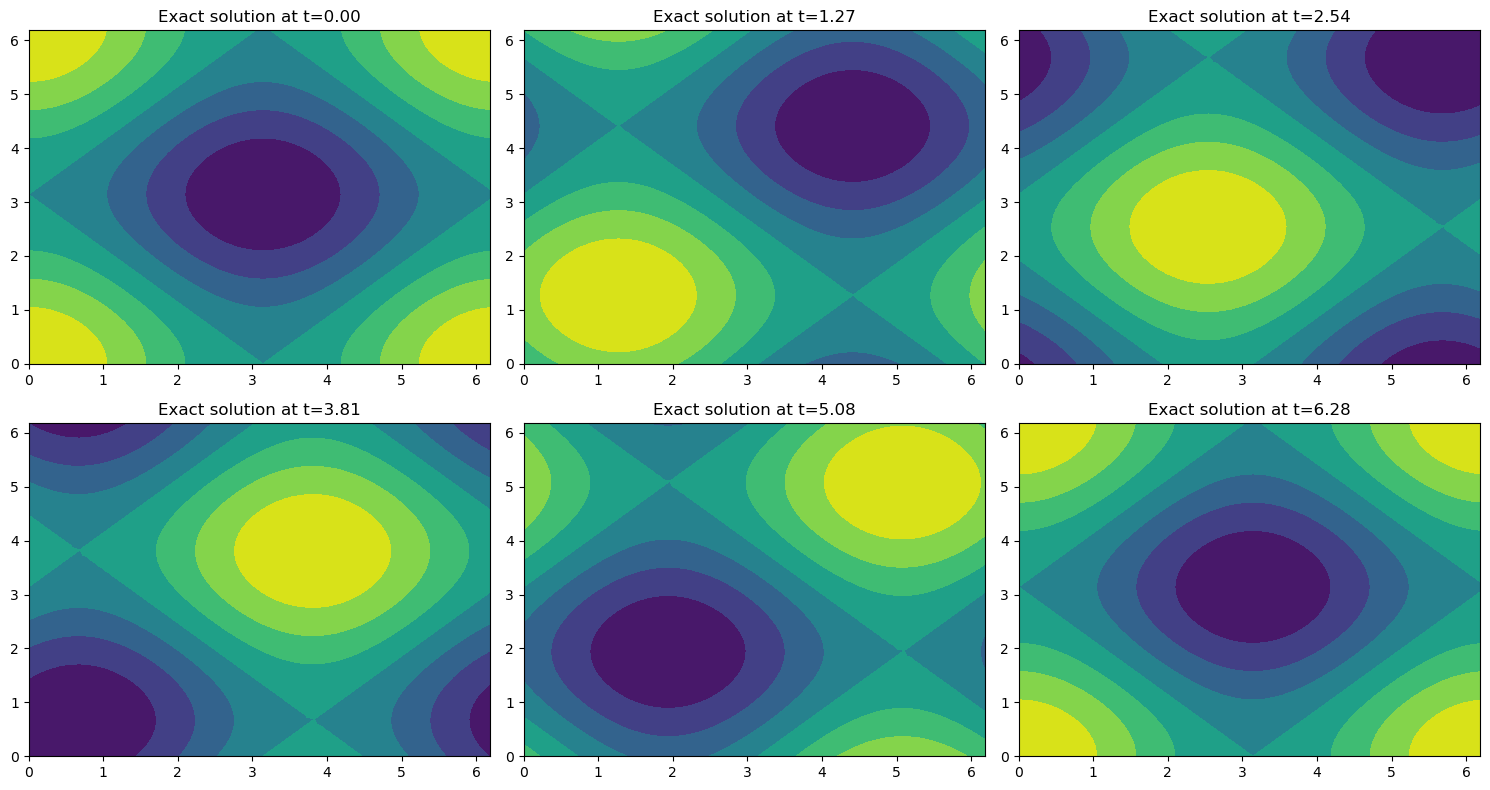

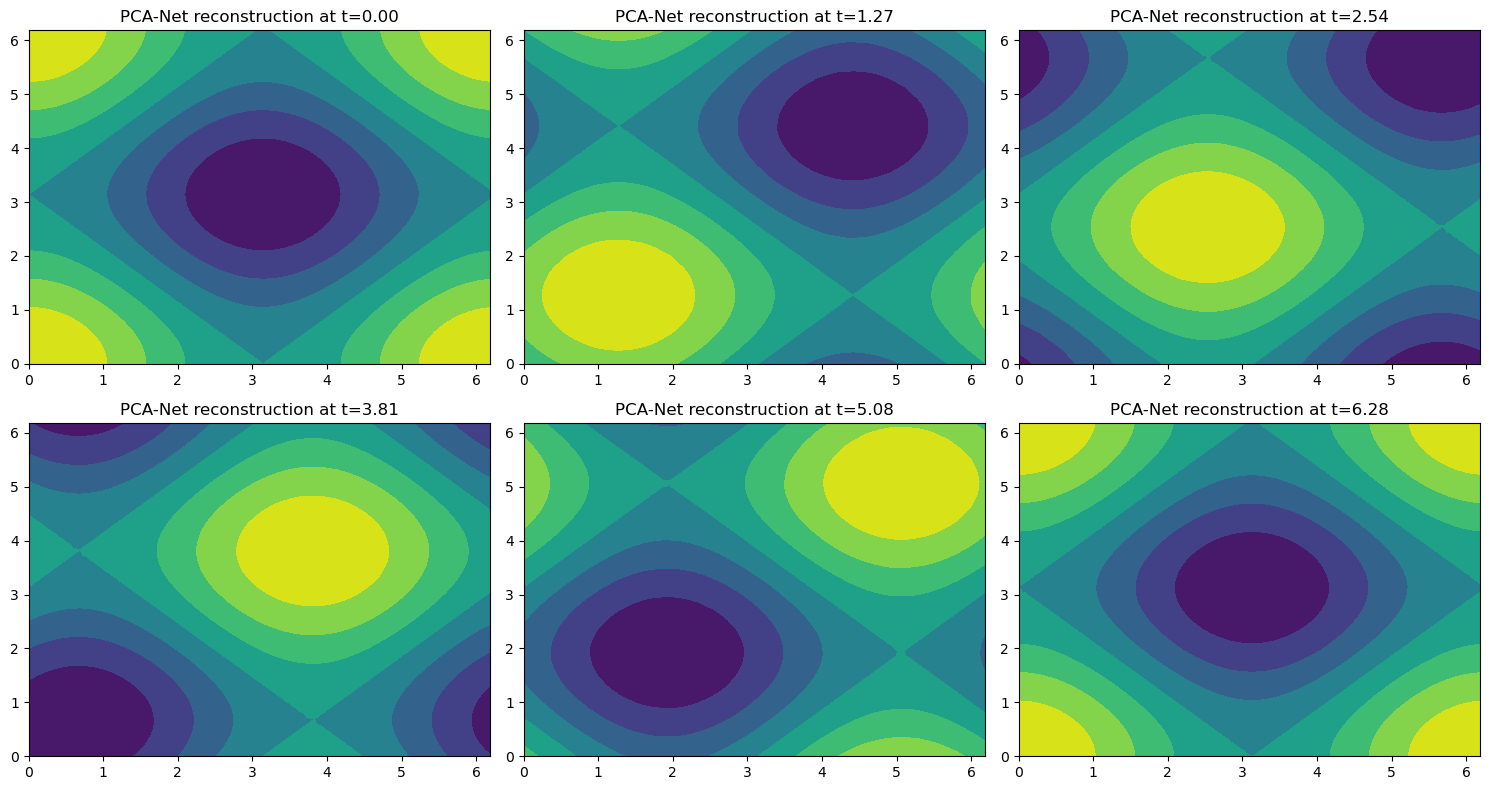

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Parameters
N = 64               # Grid points per dimension
L = 2 * np.pi        # Domain size
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(x, y)

cx, cy = 1.0, 1.0    # Advection speeds

# Initial condition u0 = 2*cos(x) + 2*cos(y)
def u0(x, y):
    return 2 * np.cos(x) + 2 * np.cos(y)

# Analytical solution at time t (due to advection)
def u_exact(x, y, t):
    return 2 * np.cos(x - cx * t) + 2 * np.cos(y - cy * t)

# Generate dataset: snapshots at different times
time_steps = 100
t_vals = np.linspace(0, 2*np.pi, time_steps)

snapshots = []
for t in t_vals:
    u_t = u_exact(X, Y, t)
    snapshots.append(u_t.flatten())

snapshots = np.array(snapshots)  # shape: (time_steps, N*N)

# Perform PCA on snapshots
pca = PCA(n_components=4)  # 4 modes as only 4 non-zero Fourier coefficients
coeffs = pca.fit_transform(snapshots)  # shape: (time_steps, 4)

# Prepare training data to predict coeffs at next time step from current
X_train = coeffs[:-1]
y_train = coeffs[1:]

# Train a simple MLP regressor to learn temporal dynamics of PCA coefficients
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict coefficients for future time steps starting from initial coeffs
predicted_coeffs = [coeffs[0]]
for i in range(time_steps-1):
    next_coeff = mlp.predict(predicted_coeffs[-1].reshape(1, -1))
    predicted_coeffs.append(next_coeff.flatten())
predicted_coeffs = np.array(predicted_coeffs)

# Reconstruct solution from predicted PCA coefficients
reconstructed = pca.inverse_transform(predicted_coeffs)  # shape: (time_steps, N*N)

# Plot comparison of exact vs reconstructed solution at a few time steps
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
plot_times = [0, 20, 40, 60, 80, 99]

for ax, idx in zip(axes.flatten(), plot_times):
    ax.contourf(X, Y, snapshots[idx].reshape(N, N), cmap='viridis')
    ax.set_title(f'Exact solution at t={t_vals[idx]:.2f}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for ax, idx in zip(axes.flatten(), plot_times):
    ax.contourf(X, Y, reconstructed[idx].reshape(N, N), cmap='viridis')
    ax.set_title(f'PCA-Net reconstruction at t={t_vals[idx]:.2f}')
plt.tight_layout()
plt.show()


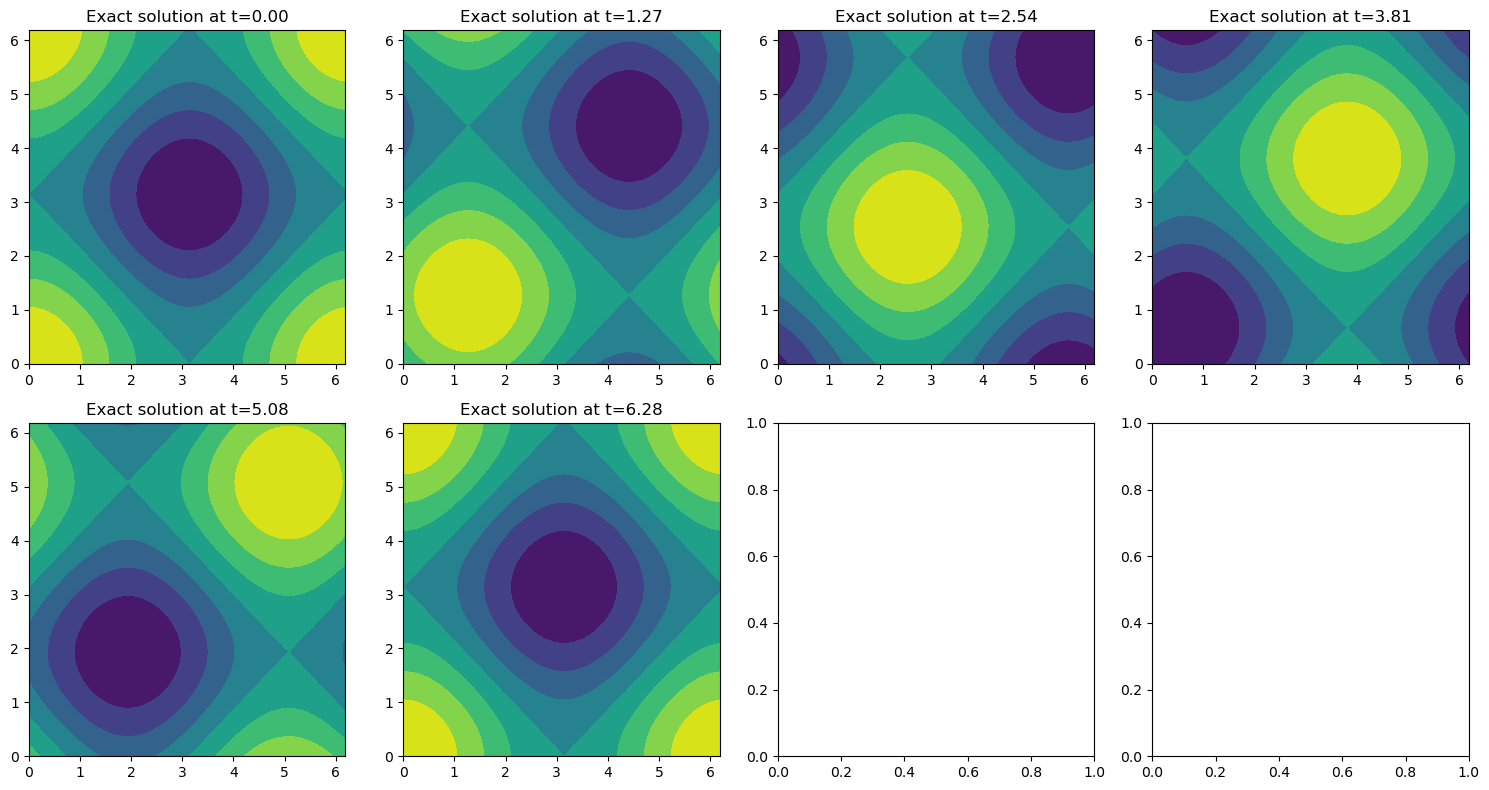

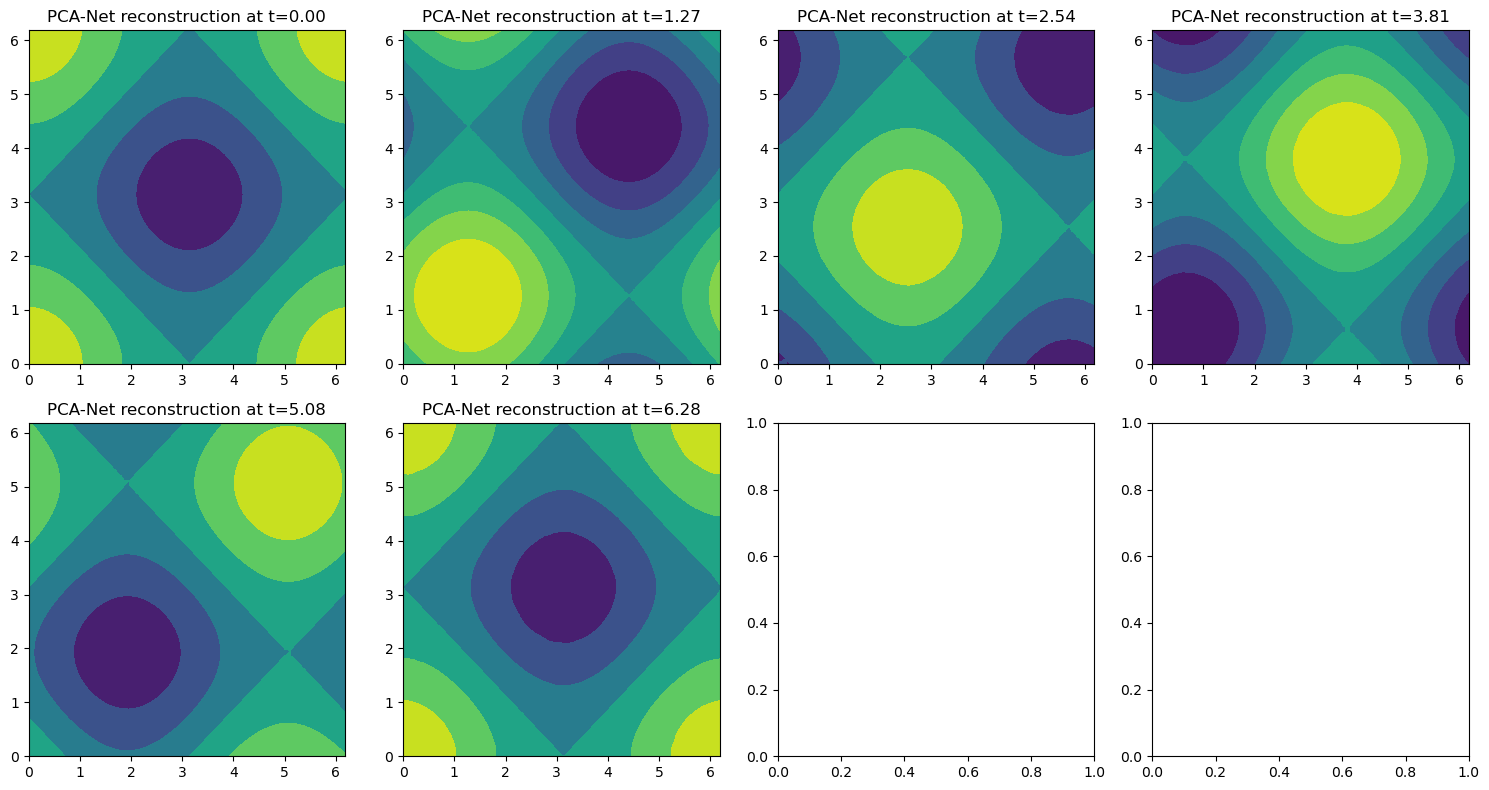

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

# Parameters
N = 64               # Grid points per dimension
L = 2 * np.pi        # Domain size
x = np.linspace(0, L, N, endpoint=False)
y = np.linspace(0, L, N, endpoint=False)
X, Y = np.meshgrid(x, y)

cx, cy = 1.0, 1.0    # Advection speeds

# Initial condition u0 = 2*cos(x) + 2*cos(y)
def u0(x, y):
    return 2 * np.cos(x) + 2 * np.cos(y)

# Analytical solution at time t (due to advection)
def u_exact(x, y, t):
    return 2 * np.cos(x - cx * t) + 2 * np.cos(y - cy * t)

# Generate dataset: snapshots at different times
time_steps = 100
t_vals = np.linspace(0, 2*np.pi, time_steps)

snapshots = []
for t in t_vals:
    u_t = u_exact(X, Y, t)
    snapshots.append(u_t.flatten())

snapshots = np.array(snapshots)  # shape: (time_steps, N*N)

# Perform PCA on snapshots
pca = PCA(n_components=4)  # 4 modes as only 4 non-zero Fourier coefficients
coeffs = pca.fit_transform(snapshots)  # shape: (time_steps, 4)

# Prepare training data to predict coeffs at next time step from current
X_train = coeffs[:-1]
y_train = coeffs[1:]

# Train a simple MLP regressor to learn temporal dynamics of PCA coefficients
mlp = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Predict coefficients for future time steps starting from initial coeffs
predicted_coeffs = [coeffs[0]]
for i in range(time_steps-1):
    next_coeff = mlp.predict(predicted_coeffs[-1].reshape(1, -1))
    predicted_coeffs.append(next_coeff.flatten())
predicted_coeffs = np.array(predicted_coeffs)

# Reconstruct solution from predicted PCA coefficients
reconstructed = pca.inverse_transform(predicted_coeffs)  # shape: (time_steps, N*N)

# Plot comparison of exact vs reconstructed solution at a few time steps
fig, axes = plt.subplots(2, 4, figsize=(15, 8))
plot_times = [0,20,40,60, 80, 99]

for ax, idx in zip(axes.flatten(), plot_times):
    ax.contourf(X, Y, snapshots[idx].reshape(N, N), cmap='viridis')
    ax.set_title(f'Exact solution at t={t_vals[idx]:.2f}')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 4, figsize=(15, 8))
for ax, idx in zip(axes.flatten(), plot_times):
    ax.contourf(X, Y, reconstructed[idx].reshape(N, N), cmap='viridis')
    ax.set_title(f'PCA-Net reconstruction at t={t_vals[idx]:.2f}')
plt.tight_layout()
plt.show()


In [5]:
from numpy.linalg import norm

# Choose a time step to evaluate (e.g., final one)
t_idx = -1  # last time step

# Extract exact and reconstructed fields at that time
u_exact_t = snapshots[t_idx]
u_recon_t = reconstructed[t_idx]

# Compute L2 norm of difference
l2_error = norm(u_exact_t - u_recon_t)
relative_error = l2_error / norm(u_exact_t)

print(f"L2 Error at t = {t_vals[t_idx]:.2f} : {l2_error:.6e}")
print(f"Relative L2 Error: {relative_error:.6e}")


L2 Error at t = 6.28 : 1.766411e+00
Relative L2 Error: 1.380009e-02


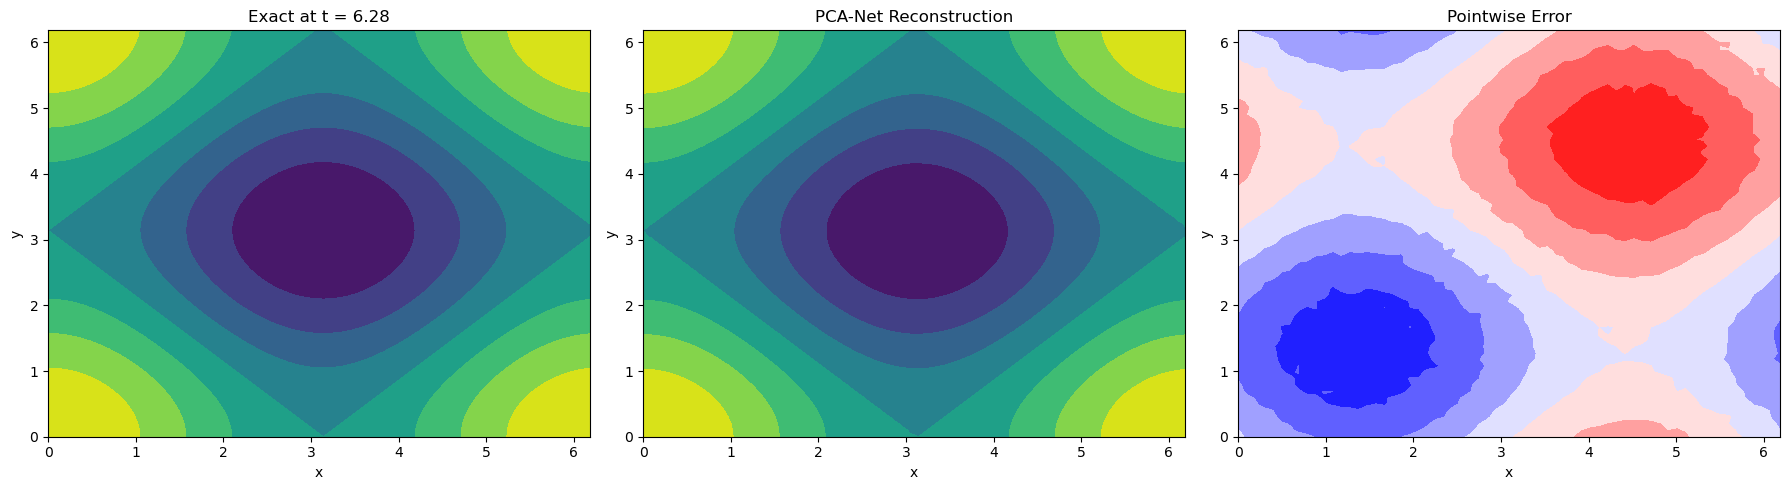

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Exact
axes[0].contourf(X, Y, u_exact_t.reshape(N, N), cmap='viridis')
axes[0].set_title(f'Exact at t = {t_vals[t_idx]:.2f}')

# Reconstructed
axes[1].contourf(X, Y, u_recon_t.reshape(N, N), cmap='viridis')
axes[1].set_title(f'PCA-Net Reconstruction')

# Error
error_field = u_recon_t - u_exact_t
axes[2].contourf(X, Y, error_field.reshape(N, N), cmap='bwr')
axes[2].set_title('Pointwise Error')

for ax in axes:
    ax.set_xlabel("x")
    ax.set_ylabel("y")

plt.tight_layout()
plt.show()


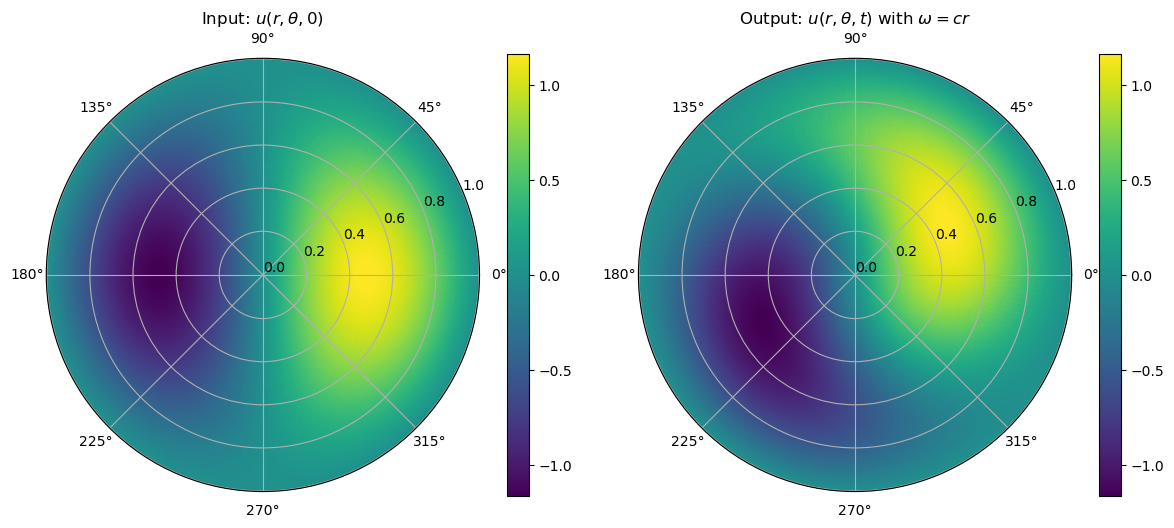

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

# Parameters
n = 1  # Bessel order
m = 1  # mode index
c = 1  # angular speed
alpha_n1 = jn_zeros(n, m)[-1]  # First zero of J_n

# Grid in polar coordinates
Nr = 200
Ntheta = 200
r = np.linspace(0, 1, Nr)
theta = np.linspace(0, 2 * np.pi, Ntheta)
R, Theta = np.meshgrid(r, theta, indexing='ij')

# Input: u(r, θ, 0) = 2 cos(θ) * J_n(α_{n,1} r)
u0 = 2 * np.cos(Theta) * jn(n, alpha_n1 * R)

# Output at time t: rotation due to angular velocity ω = c * r
t = 1.0  # time
Theta_rotated = Theta - c * R * t  # Angular shift
u_rotated = 2 * np.cos(Theta_rotated) * jn(n, alpha_n1 * R)

# Convert polar to Cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Plot input and output
fig, axs = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': 'polar'})

# Input
c0 = axs[0].pcolormesh(Theta, R, u0, shading='auto', cmap='viridis')
axs[0].set_title("Input: $u(r,\\theta,0)$")
fig.colorbar(c0, ax=axs[0], orientation='vertical')

# Output
c1 = axs[1].pcolormesh(Theta, R, u_rotated, shading='auto', cmap='viridis')
axs[1].set_title("Output: $u(r,\\theta,t)$ with $\\omega = c/r$")
fig.colorbar(c1, ax=axs[1], orientation='vertical')

plt.tight_layout()
plt.show()


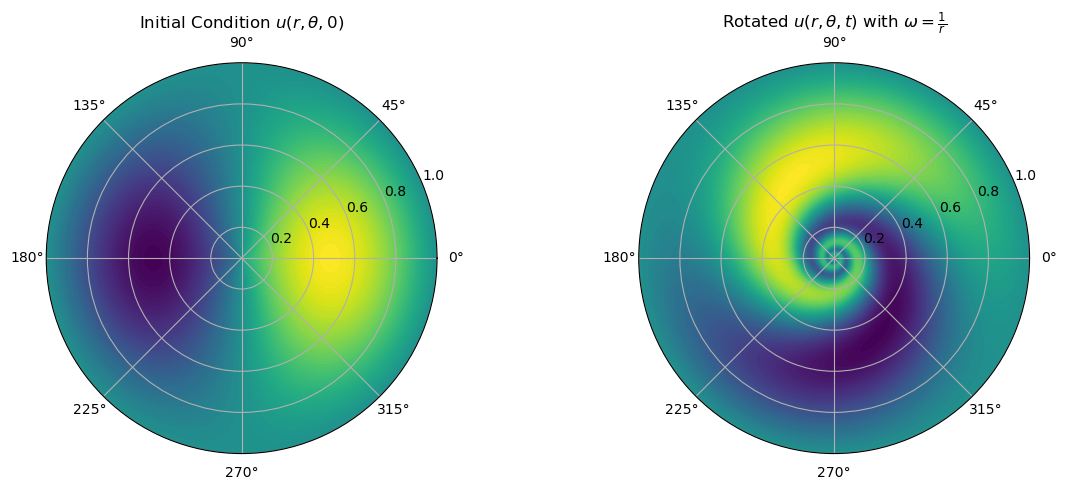

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn, jn_zeros

# Parameters
n = 1
alpha_n1 = jn_zeros(n, 1)[0]   # First zero of J_n
c = 1
t = 1.0

# Polar grid
Nr = 200
Ntheta = 200
r = np.linspace(0.05, 1, Nr)        # avoid r=0
theta = np.linspace(0, 2*np.pi, Ntheta)
R, Theta = np.meshgrid(r, theta)

# Initial condition u(r, theta, 0)
U0 = 2 * np.cos(Theta) * jn(n, alpha_n1 * R)

# Evolved condition u(r, theta, t)
Omega = c / R
U_t = 2 * np.cos(Theta - Omega * t) * jn(n, alpha_n1 * R)

# Convert to cartesian for plotting
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Plot
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': 'polar'}, figsize=(12,5))
axs[0].contourf(Theta, R, U0, 100, cmap='viridis')
axs[0].set_title('Initial Condition $u(r, \\theta, 0)$')

axs[1].contourf(Theta, R, U_t, 100, cmap='viridis')
axs[1].set_title('Rotated $u(r, \\theta, t)$ with $\\omega=\\frac{1}{r}$')

plt.tight_layout()
plt.show()
